<a href="https://colab.research.google.com/github/MateusGheorghe/LAMP/blob/master/Medley_Step_3_Features_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
SAVE=1 #SAVE == 1 for save files / == 0 do not save
SEED=8 #Arbitrary seed.

In [3]:
from google.colab import drive
drive.mount("/gdrive")
import os
os.chdir("/gdrive/My Drive/MESTRADO/Natacao")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
!pip install scikit-garden
!pip install control

     |████████████████████████████████| 317kB 4.9MB/s 
  Created wheel for scikit-garden: filename=scikit_garden-0.1.3-cp36-cp36m-linux_x86_64.whl size=665289 sha256=b422bacb477b0d9c121df54999ad3bb208ede875f05d9119180a3c9507c7dbf3
  Stored in directory: /root/.cache/pip/wheels/d0/ef/71/3a032ba9a2b70690c9f9ec2e383afee6610f509af312ff2cf3
Successfully built scikit-garden
     |████████████████████████████████| 256kB 4.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=fcafcf1e27fb5aabd3ef135616ae27df5d9492a5303049910b5b1e5c4d52e26f
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [5]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from scipy.io import loadmat
from mpl_toolkits import mplot3d
from sklearn import preprocessing
import pickle
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from skgarden import RandomForestQuantileRegressor
import time
from math import pi
from control import mag2db

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.tree.tree module is  depreca

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.pyplot as plt
SMALL_SIZE = 22
MEDIUM_SIZE = 42
BIGGER_SIZE = 62
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [0]:
def tic():
    #Homemade version of matlab tic and toc functions
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [0]:
def TIC():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc1
    startTime_for_tictoc1 = time.time()

def TOC():
    import time
    if 'startTime_for_tictoc1' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc1))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [9]:
ls

 BD_AI_bucket.csv
 BD_AI_crossover.csv
 BD_AI_open.csv
 BD_AI_somersault.csv
 BD_Medley_3MostImportantFeats.pickle
 BD_Medley.pickle
'Medley-Step_1 - Exploratory_Data_Analysis.ipynb'
'Medley-Step_2 - Model_Definition.ipynb'
'Medley-Step_3 - Features_Analysis.ipynb'
'Medley-Step_4 - Model_Definition_with_fewer_features.ipynb'
 Model_Medley_Results_10-kfold.pickle
 Model_Medley_Results_3MostImportantFeatures_10-kfold.pickle
 Model_Medley_Results_3MostImportantFeatures_5-kfold.pickle
 Model_Medley_Results_3MostImportantFeatures_LOOCV.pickle
 Model_Medley_Results_5-kfold.pickle
 Model_Medley_Results_LOOCV.pickle
 Original_medleyturn_Helon.xls


# Features Analysis

In [0]:
TIC()

In [0]:
BD={}
with open('BD_Medley.pickle', 'rb') as filename:
  BD[0],BD[1],BD[2],BD[3] = pickle.load(filename)
BD_Label={0:'Bucket',1:'Crossover',2:'Open',3:'Somersault'}
with open('Model_Medley_Results_LOOCV.pickle', 'rb') as filename:
  models1,params1,BestParams1,BestMSE1,BestR21 = pickle.load(filename)
with open('Model_Medley_Results_5-kfold.pickle', 'rb') as filename:
  models2,params2,BestParams2,BestMSE2,BestR22 = pickle.load(filename)
with open('Model_Medley_Results_10-kfold.pickle', 'rb') as filename:
  models3,params3,BestParams3,BestMSE3,BestR23 = pickle.load(filename)

In [12]:
print(BestMSE1[0]['XGBST'])
print(BestMSE1[1]['XGBST'])
print(BestMSE1[2]['XGBST'])
print(BestMSE1[3]['XGBST'])

-0.001606433254611295
-0.0026836867611351165
-0.0011949311193947207
-0.0019614996524538087


In [13]:
print(BestMSE2[0]['XGBST'])
print(BestMSE2[1]['XGBST'])
print(BestMSE2[2]['XGBST'])
print(BestMSE2[3]['XGBST'])

-0.002060462731392891
-0.0029028720919874835
-0.0016182040324758244
-0.0022271247367417223


In [14]:
print(BestMSE3[0]['XGBST'])
print(BestMSE3[1]['XGBST'])
print(BestMSE3[2]['XGBST'])
print(BestMSE3[3]['XGBST'])

-0.0014979603809712606
-0.0024342342323175714
-0.001355055823383231
-0.002129809801656636


In [15]:
print(BestR21[0]['XGBST'])
print(BestR21[1]['XGBST'])
print(BestR21[2]['XGBST'])
print(BestR21[3]['XGBST'])

0.9447920659582871
0.8977504914511953
0.9541912633007995
0.9203665723503658


In [16]:
print(BestR22[0]['XGBST'])
print(BestR22[1]['XGBST'])
print(BestR22[2]['XGBST'])
print(BestR22[3]['XGBST'])

0.9615382754226214
0.9394951386770967
0.9705901456554734
0.963099476725462


In [17]:
print(BestR23[0]['XGBST'])
print(BestR23[1]['XGBST'])
print(BestR23[2]['XGBST'])
print(BestR23[3]['XGBST'])

0.9635334533908038
0.9092415142371773
0.9707482490909118
0.9433640091977875


In [0]:
def createRadar(player, data):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()

In [19]:
X={}
y={}
INPUT_DIM={}
N={}
for j in range(0,4):
  X[j]=np.array(BD[j].values[:,0:np.size(BD[j],axis=1)-1],dtype='float64')
  y[j]=np.array(BD[j]['TotalTurntime15m'],dtype='float64')
  INPUT_DIM[j]=np.size(X[j],axis=1) # Number of features
  N[j]=np.size(X[j],axis=0)
  print('Dataset {} ({})'.format(j,BD_Label[j]))
  print('Number of features:{}'.format(INPUT_DIM[j]))
  print('Number of samples: {}'.format(N[j]))
  print(' ')

Dataset 0 (Bucket)
Number of features:10
Number of samples: 45
 
Dataset 1 (Crossover)
Number of features:11
Number of samples: 51
 
Dataset 2 (Open)
Number of features:12
Number of samples: 60
 
Dataset 3 (Somersault)
Number of features:11
Number of samples: 53
 


In [0]:
from numpy.random import seed
seed(SEED)

# SHAP - Features Importance

In [21]:
!pip install shap
import shap

     |████████████████████████████████| 276kB 4.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394112 sha256=625b1c17f9e74b8bde7228866b74f17941e0e77ecee56509428d0e6c7ef789f9
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Default GBST escolhido devido a ser o algoritmo que apresentou os melhores resultados no LOOCV randomized parameter earch procedure.

In [0]:
#Model Chosen
model = models3['XGBST']

In [0]:
def SHAP_Feat_Importance(model,X,y):
  model.fit(X,y)
  print(model.feature_importances_)
  importances = model.feature_importances_
  indices = np.argsort(importances)
  features = X.columns
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='b', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()
  indic=list(indices)
  indic.reverse()
  Importances=list(importances[indic])
  Features=list(features[indic])
  return importances,features,Importances,Features

In [0]:
def createRadar1(dataset_name, importance, feature):
  importance += importance [:1]
  importance=list(mag2db(importance))
  angles = [n / len(feature) * 2 * pi for n in range(len(feature))]
  angles += angles [:1]
      
  ax = plt.subplot(111, polar=True)
  plt.xticks(angles[:-1],feature)
  ax.plot(angles,importance)
  ax.fill(angles, importance, 'blue', alpha=0.1)
  ax.set_title(dataset_name)
  plt.show()

def createRadar2(dataset_name, importance, feature):
  importance += importance [:1]
  angles = [n / len(feature) * 2 * pi for n in range(len(feature))]
  angles += angles [:1]
      
  ax = plt.subplot(111, polar=True)
  plt.xticks(angles[:-1],feature)
  ax.plot(angles,importance)
  ax.fill(angles, importance, 'blue', alpha=0.1)
  ax.set_title(dataset_name)
  plt.show()

Bucket

In [0]:
Importances={}
importances={}
Features={}
features={}
BD_new={}

[1.5031555e-01 7.5825945e-02 2.6552554e-03 6.8110302e-03 2.3480869e-04
 4.1671284e-03 7.5485593e-01 6.4693647e-04 3.6757230e-03 8.1174826e-04]


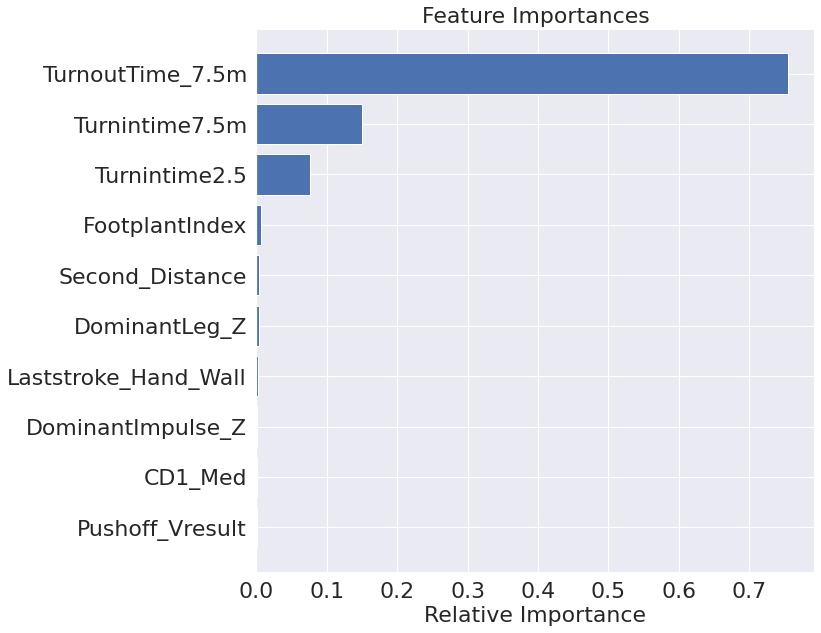

In [26]:
X=BD[0].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[0]['TotalTurntime15m'],dtype='float64')
importances[0],features[0],Importances[0],Features[0]=SHAP_Feat_Importance(model,X,y)
BD_new[0]=BD[0][list(Features[0][0:3])]

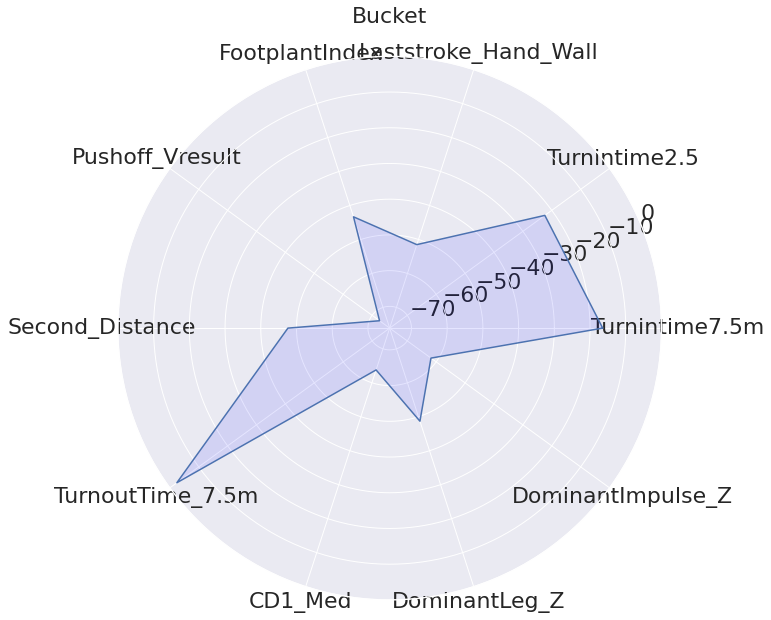

In [27]:
createRadar1(BD_Label[0],list(importances[0]),list(features[0]))

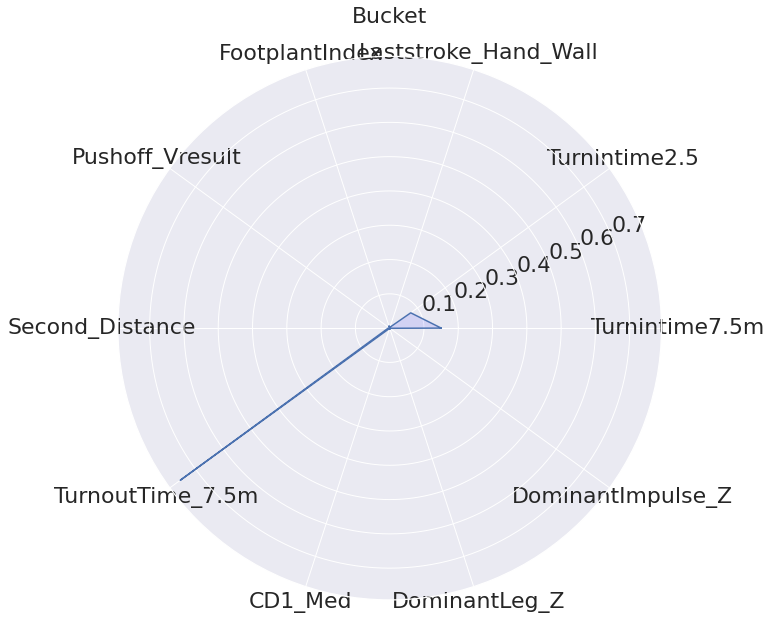

In [28]:
createRadar2(BD_Label[0],list(importances[0]),list(features[0]))

Crossover

[0.6659593  0.00289217 0.00268552 0.00900208 0.01487402 0.0306493
 0.00224635 0.265107   0.00265507 0.00240733 0.00152179]


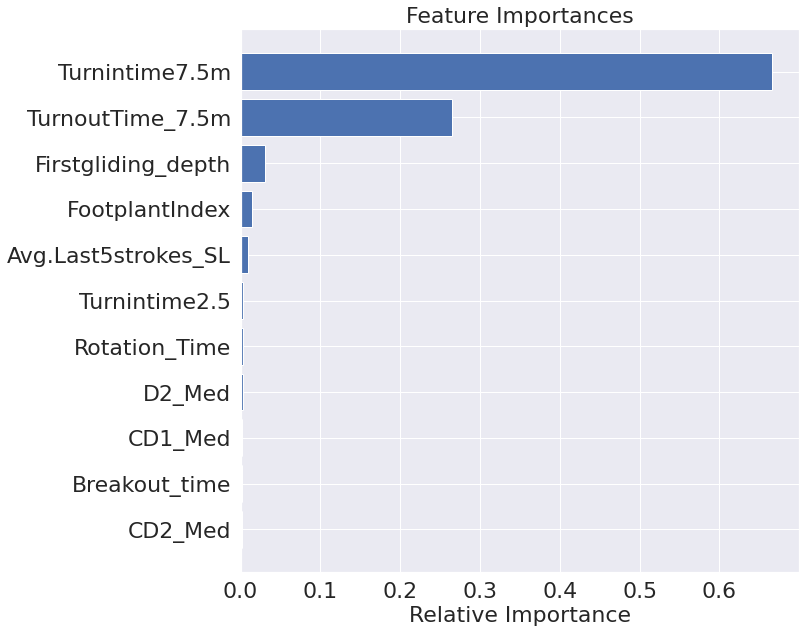

In [29]:
X=BD[1].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[1]['TotalTurntime15m'],dtype='float64')
importances[1],features[1],Importances[1],Features[1]=SHAP_Feat_Importance(model,X,y)
BD_new[1]=BD[1][list(Features[1][0:3])]

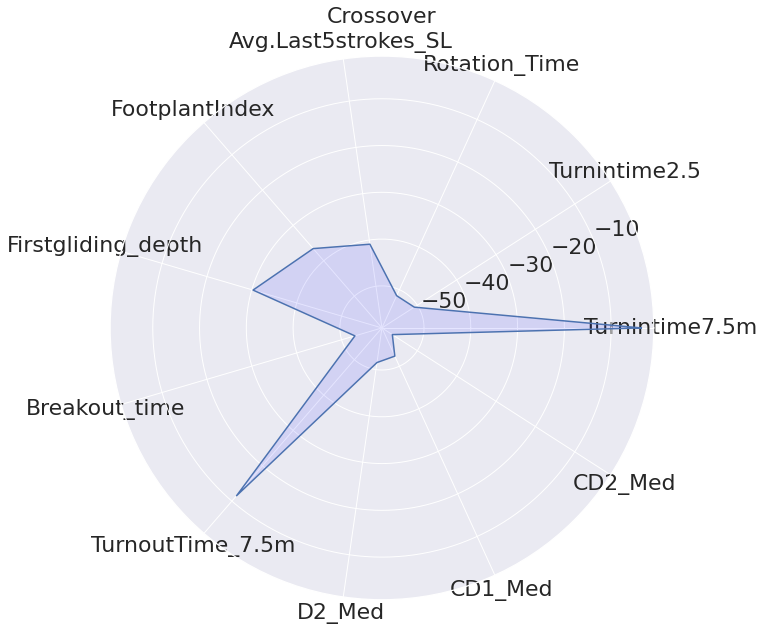

In [30]:
createRadar1(BD_Label[1],list(importances[1]),list(features[1]))

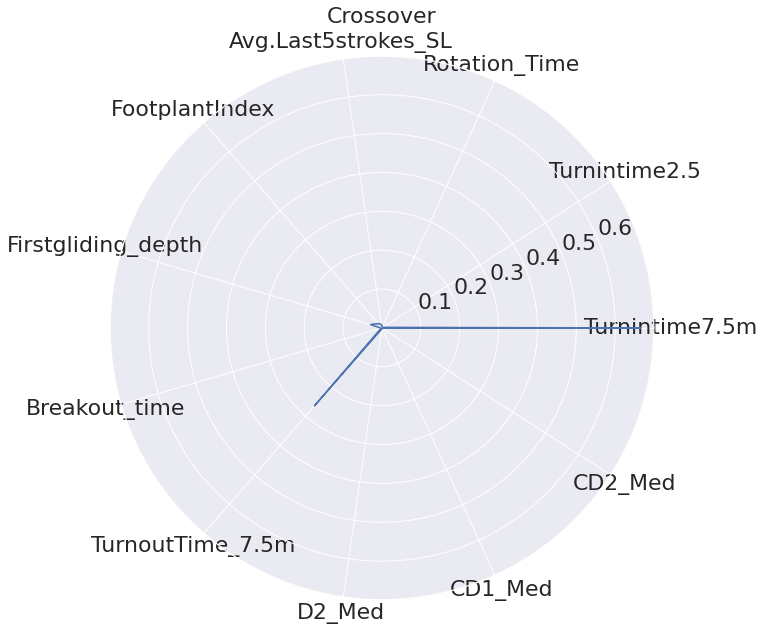

In [31]:
createRadar2(BD_Label[1],list(importances[1]),list(features[1]))

Open

[1.9779083e-01 1.1188036e-02 9.8724570e-04 4.9547520e-03 7.0472941e-04
 3.3839294e-04 1.4697454e-02 7.2936219e-01 8.1539499e-03 2.2691075e-02
 3.3519559e-03 5.7794251e-03]


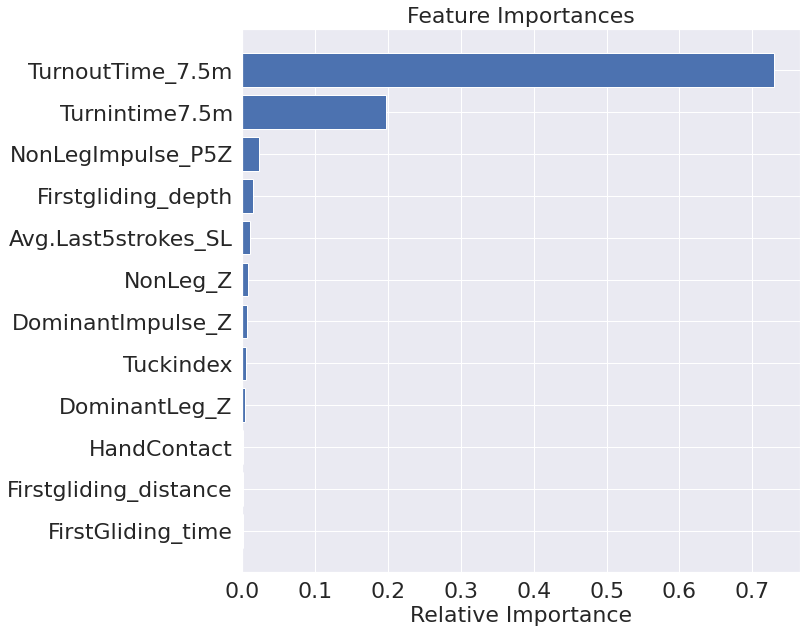

In [32]:
X=BD[2].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[2]['TotalTurntime15m'],dtype='float64')
importances[2],features[2],Importances[2],Features[2]=SHAP_Feat_Importance(model,X,y)
BD_new[2]=BD[2][list(Features[2][0:3])]

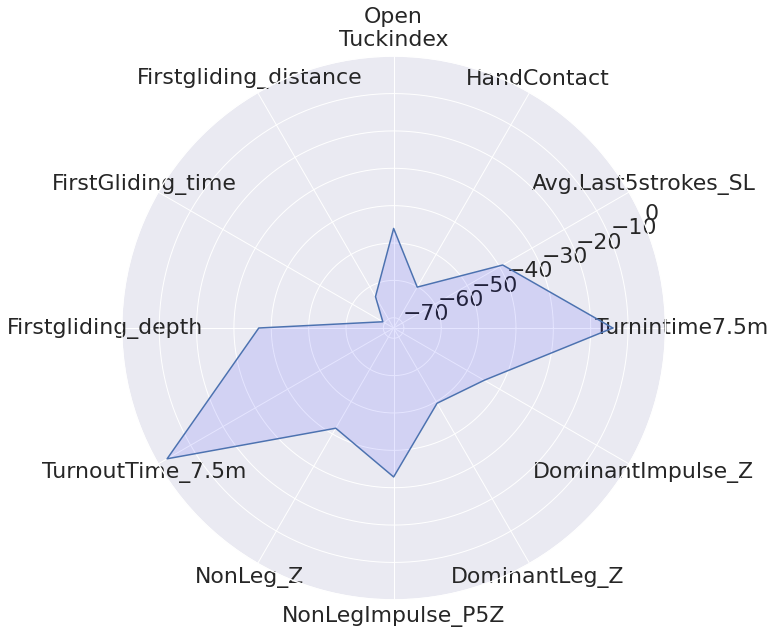

In [33]:
createRadar1(BD_Label[2],list(importances[2]),list(features[2]))

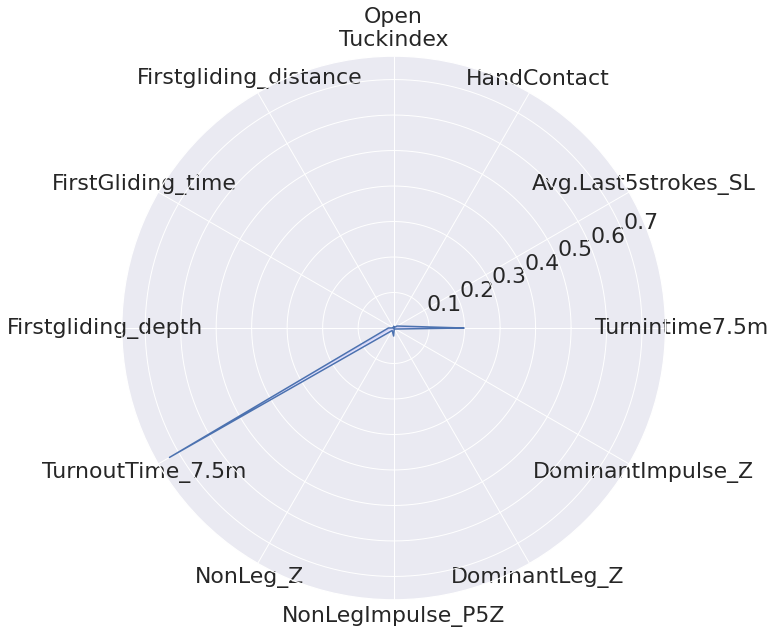

In [34]:
createRadar2(BD_Label[2],list(importances[2]),list(features[2]))

Somersault

[1.7568547e-01 1.5622667e-02 7.6629780e-03 1.6264452e-03 1.3872492e-03
 1.7543988e-04 6.0891369e-03 3.1068981e-02 7.5195098e-01 3.5611380e-04
 8.3745876e-03]


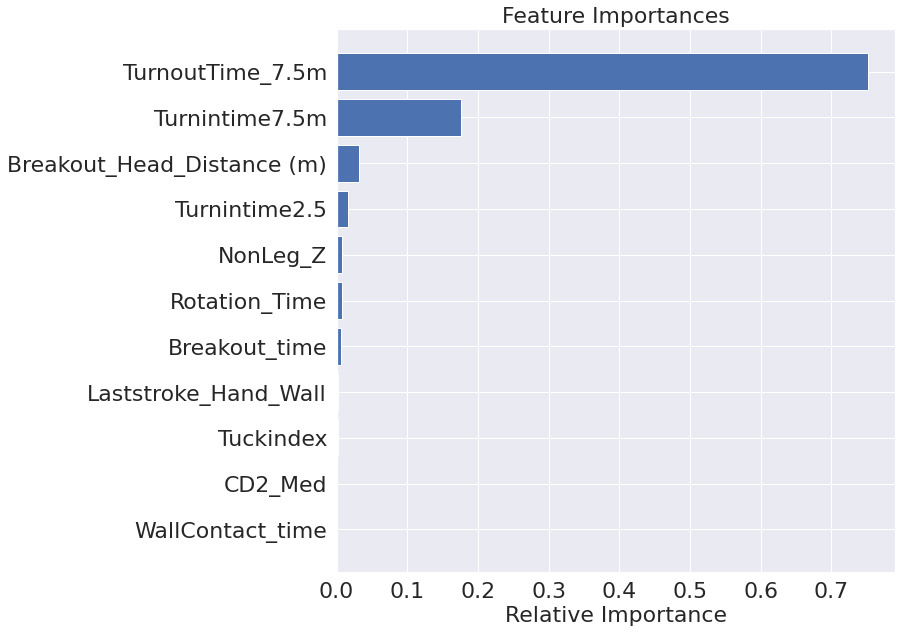

In [35]:
X=BD[3].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[3]['TotalTurntime15m'],dtype='float64')
importances[3],features[3],Importances[3],Features[3]=SHAP_Feat_Importance(model,X,y)
BD_new[3]=BD[3][list(Features[3][0:3])]

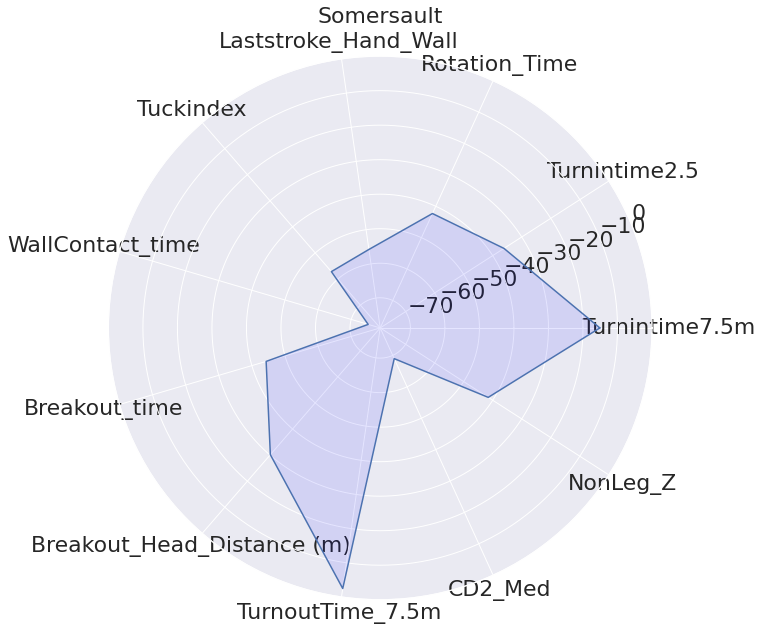

In [36]:
createRadar1(BD_Label[3],list(importances[3]),list(features[3]))

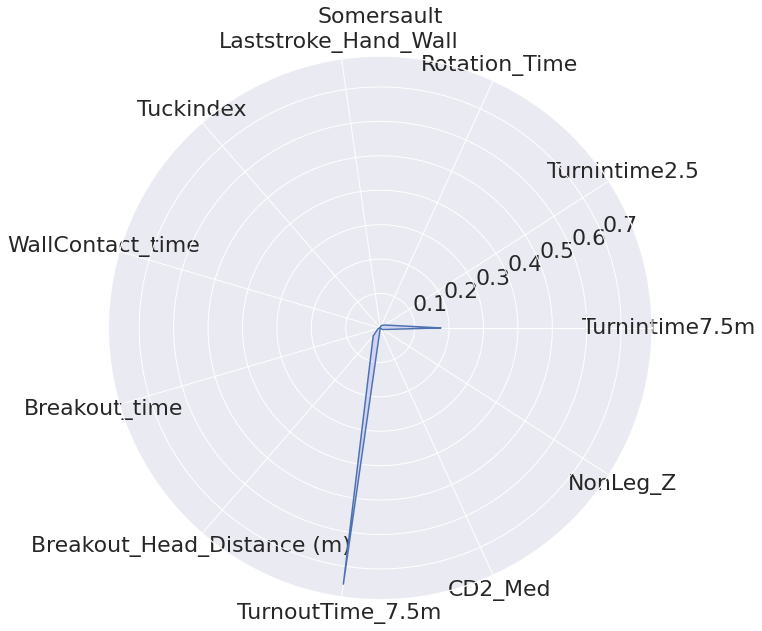

In [37]:
createRadar2(BD_Label[3],list(importances[3]),list(features[3]))

# Saving

Saving the same datasets with the 3 features with the most relative importance.

In [0]:
BD_Bucket=pd.concat([BD_new[0],BD[0]['TotalTurntime15m']],axis=1)
BD_Crossover=pd.concat([BD_new[1],BD[1]['TotalTurntime15m']],axis=1)
BD_Open=pd.concat([BD_new[2],BD[2]['TotalTurntime15m']],axis=1)
BD_Somersault=pd.concat([BD_new[3],BD[3]['TotalTurntime15m']],axis=1)
if SAVE==1:
  with open('BD_Medley_3MostImportantFeats.pickle', 'wb') as filename:
    pickle.dump([BD_Bucket,BD_Crossover,BD_Open,BD_Somersault], filename)

# pyGAM - Features Analysis

In [39]:
!pip install pygam
!pip install flit

     |████████████████████████████████| 1.8MB 4.7MB/s 
     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 40kB 3.5MB/s 


In [0]:
from pygam import LinearGAM
import flit

In [0]:
def LinGAM(X,y):
  # lams=np.random.uniform(1e-3,1e3,(100,np.size(X,axis=1)))
  # gam=LinearGAM(n_splines=[5,7,7,7,7,7,7,5,7,5]).gridsearch(X.values,y,lam=lams)
  gam=LinearGAM().fit(X.values,y)
  print(gam.summary())
  plt.plot(gam.predict(X))
  plt.plot(y)
  return gam

In [0]:
def PlotAllFeatDep(X,gam):
  titles = X.columns
  plt.figure()
  fig, axs = plt.subplots(1,np.size(X,axis=1),figsize=(40, 8))
  for i, ax in enumerate(axs):
      XX = gam.generate_X_grid(term=i)
      ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
      ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
      ax.scatter(XX[:,i], gam.partial_dependence(term=i, X=XX), c='k', alpha=0.2)

      if i == 0:
          # ax.set_ylim(-30,30)
          ax.set_ylim(-0.2,1.2)
      ax.set_title(titles[i])

Default GBST escolhido devido a ser o algoritmo que apresentou os melhores resultados no LOOCV randomized parameter search procedure.

Bucket

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.8035
Link Function:                     IdentityLink Log Likelihood:                                  -753.1691
Number of Samples:                           45 AIC:                                             1525.9451
                                                AICc:                                            1532.1393
                                                GCV:                                                0.0311
                                                Scale:                                              0.0204
                                                Pseudo R-Squared:                                   0.7638
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



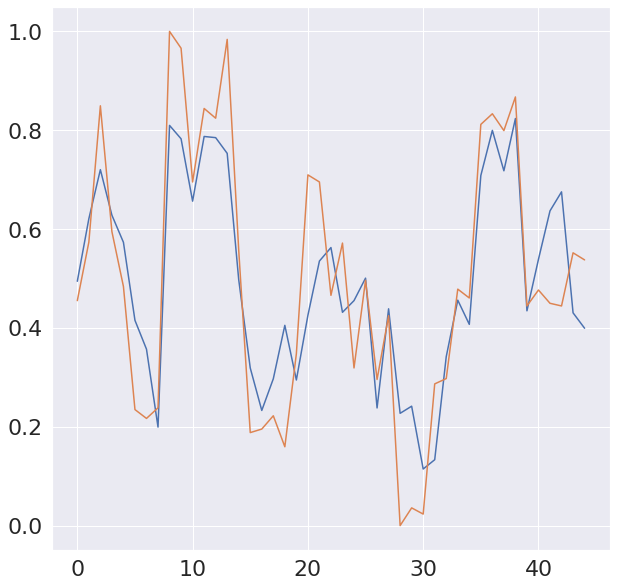

In [43]:
X=BD[0].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[0]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

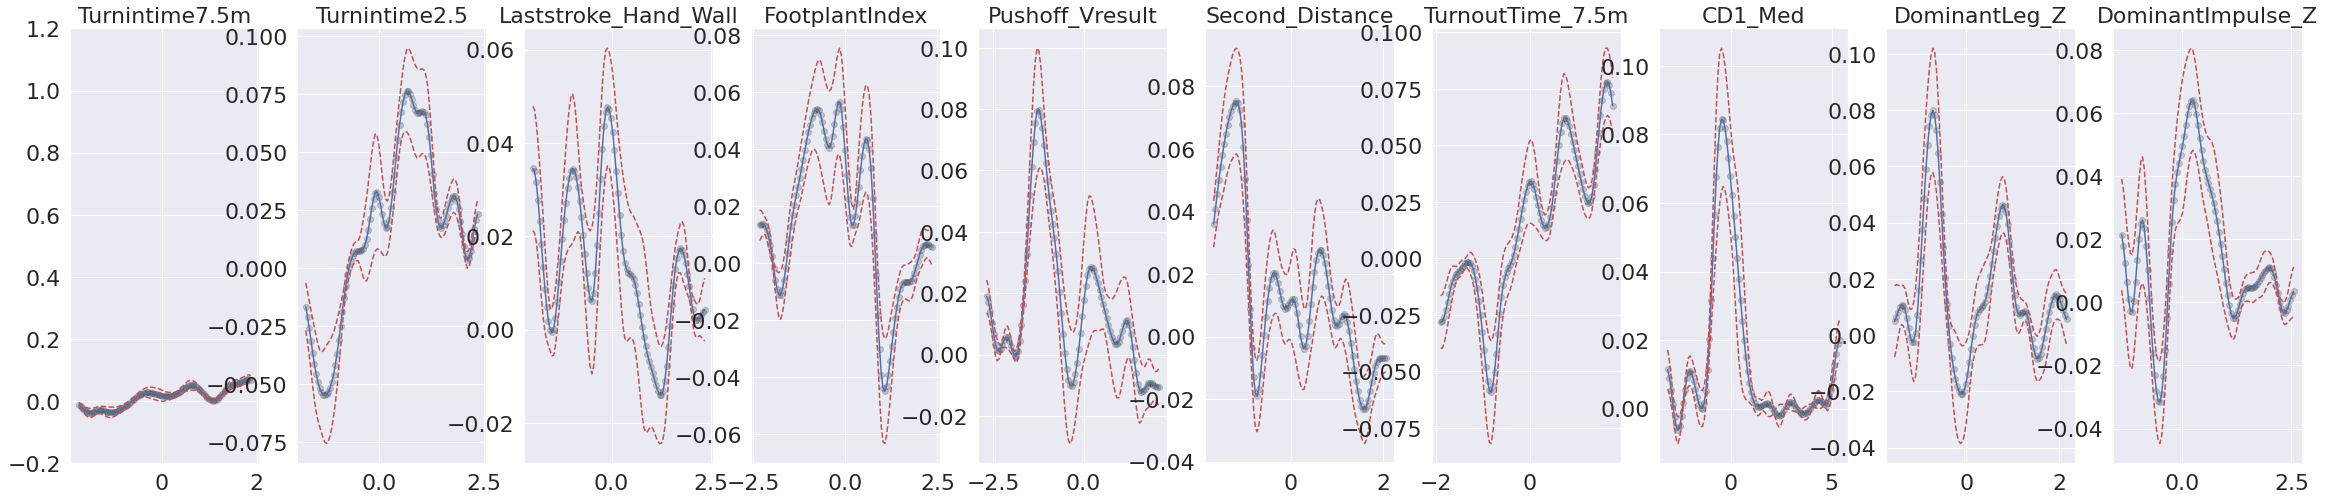

In [44]:
PlotAllFeatDep(X,gam)

Crossover

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.5368
Link Function:                     IdentityLink Log Likelihood:                                 -1334.7516
Number of Samples:                           51 AIC:                                             2694.5769
                                                AICc:                                            2703.6369
                                                GCV:                                                0.0217
                                                Scale:                                              0.0131
                                                Pseudo R-Squared:                                   0.7743
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



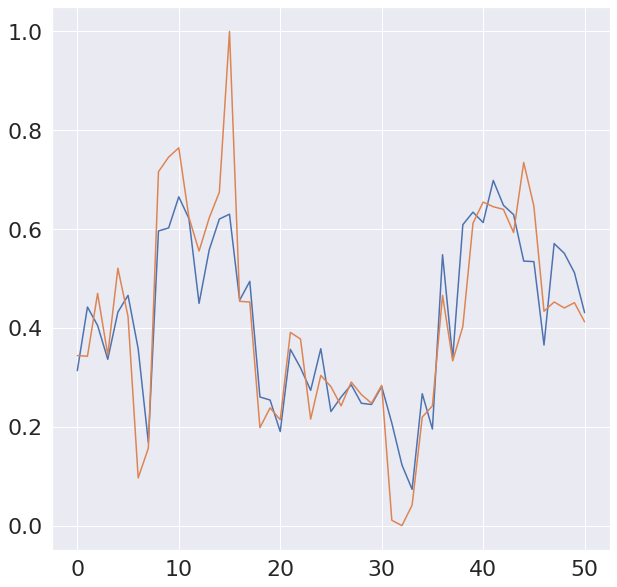

In [45]:
X=BD[1].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[1]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

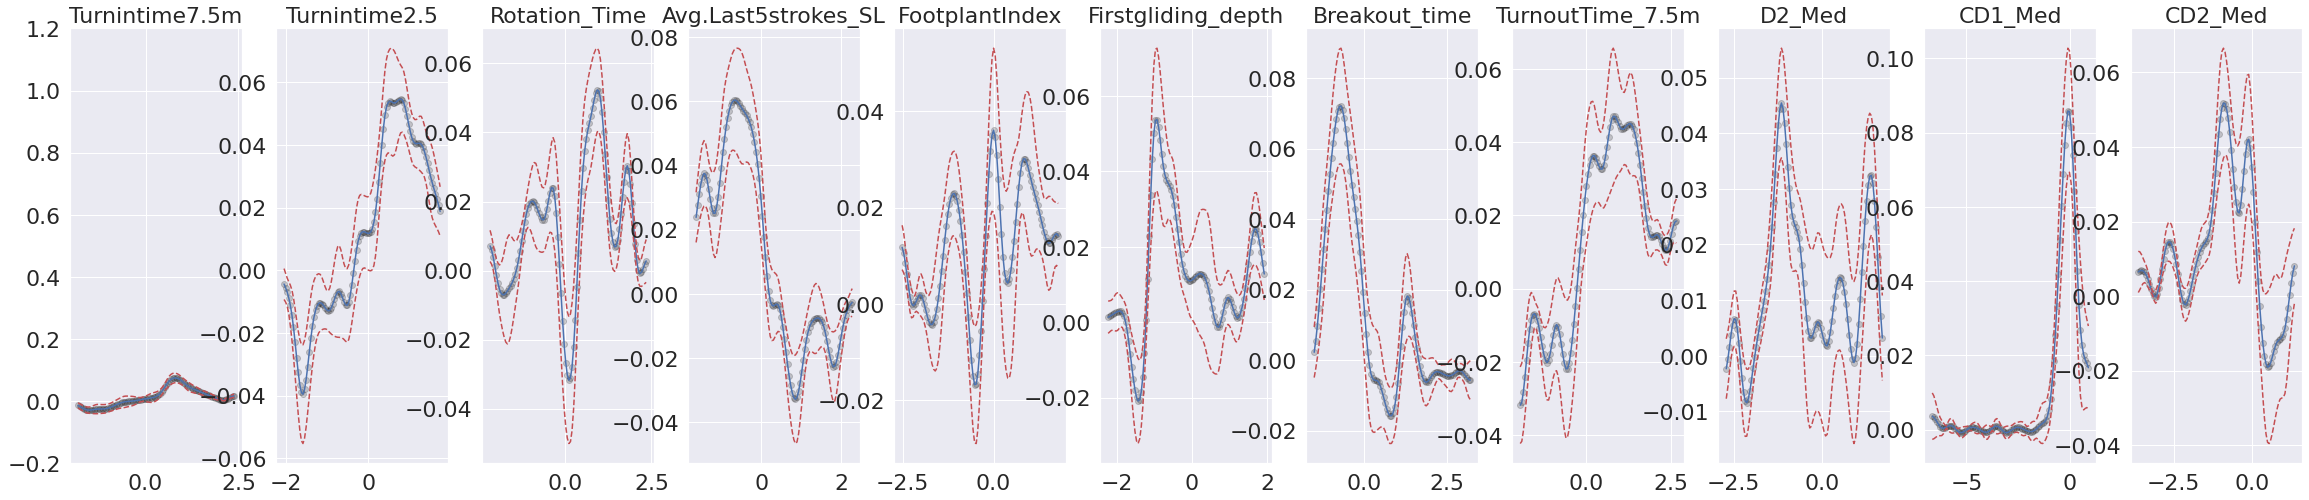

In [46]:
PlotAllFeatDep(X,gam)

Open

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     16.1155
Link Function:                     IdentityLink Log Likelihood:                                  -1257.349
Number of Samples:                           60 AIC:                                             2548.9291
                                                AICc:                                            2563.7344
                                                GCV:                                                0.0284
                                                Scale:                                              0.0151
                                                Pseudo R-Squared:                                   0.8165
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



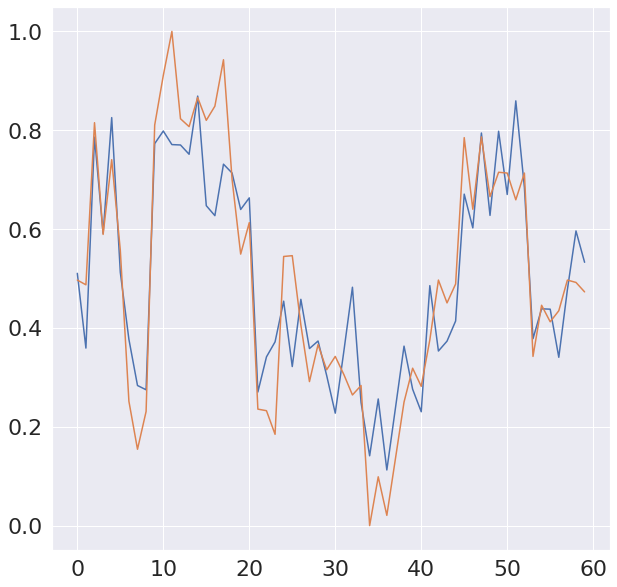

In [47]:
X=BD[2].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[2]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

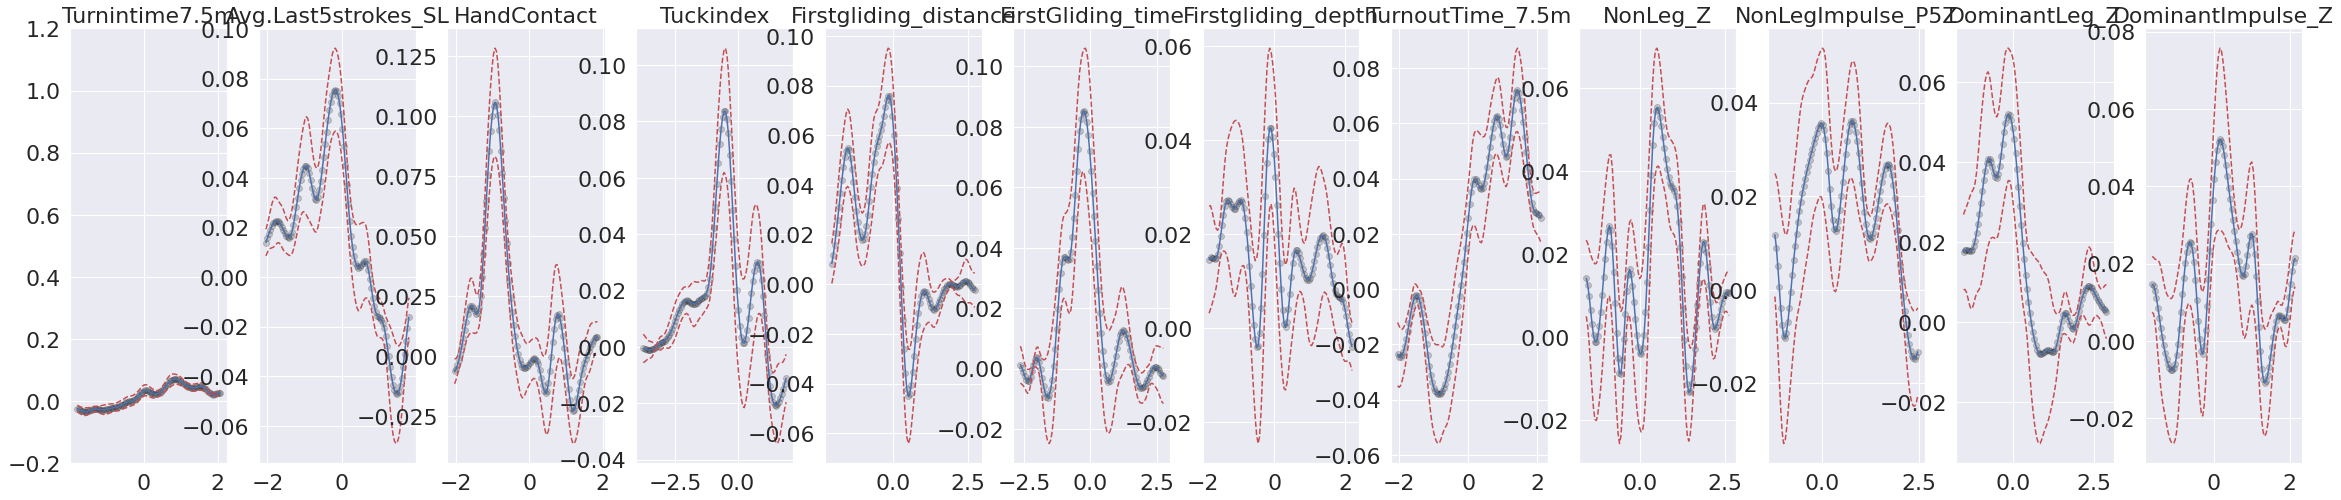

In [48]:
PlotAllFeatDep(X,gam)

Somersault

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      13.288
Link Function:                     IdentityLink Log Likelihood:                                 -1130.6528
Number of Samples:                           53 AIC:                                             2289.8815
                                                AICc:                                            2301.4658
                                                GCV:                                                0.0271
                                                Scale:                                              0.0152
                                                Pseudo R-Squared:                                   0.8128
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



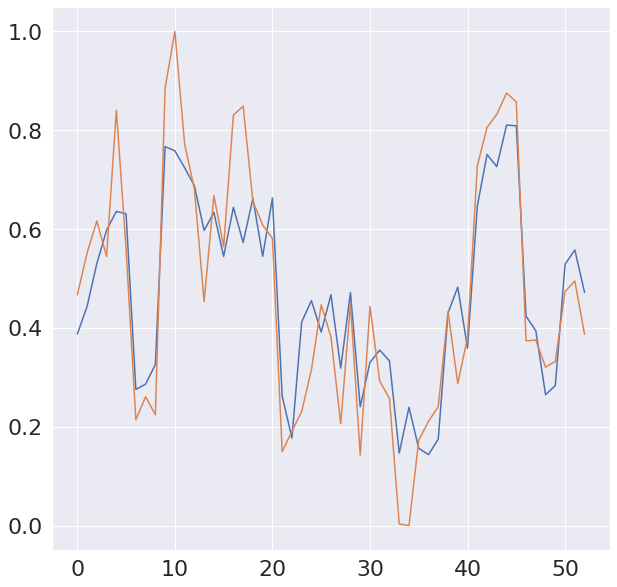

In [49]:
X=BD[3].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[3]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

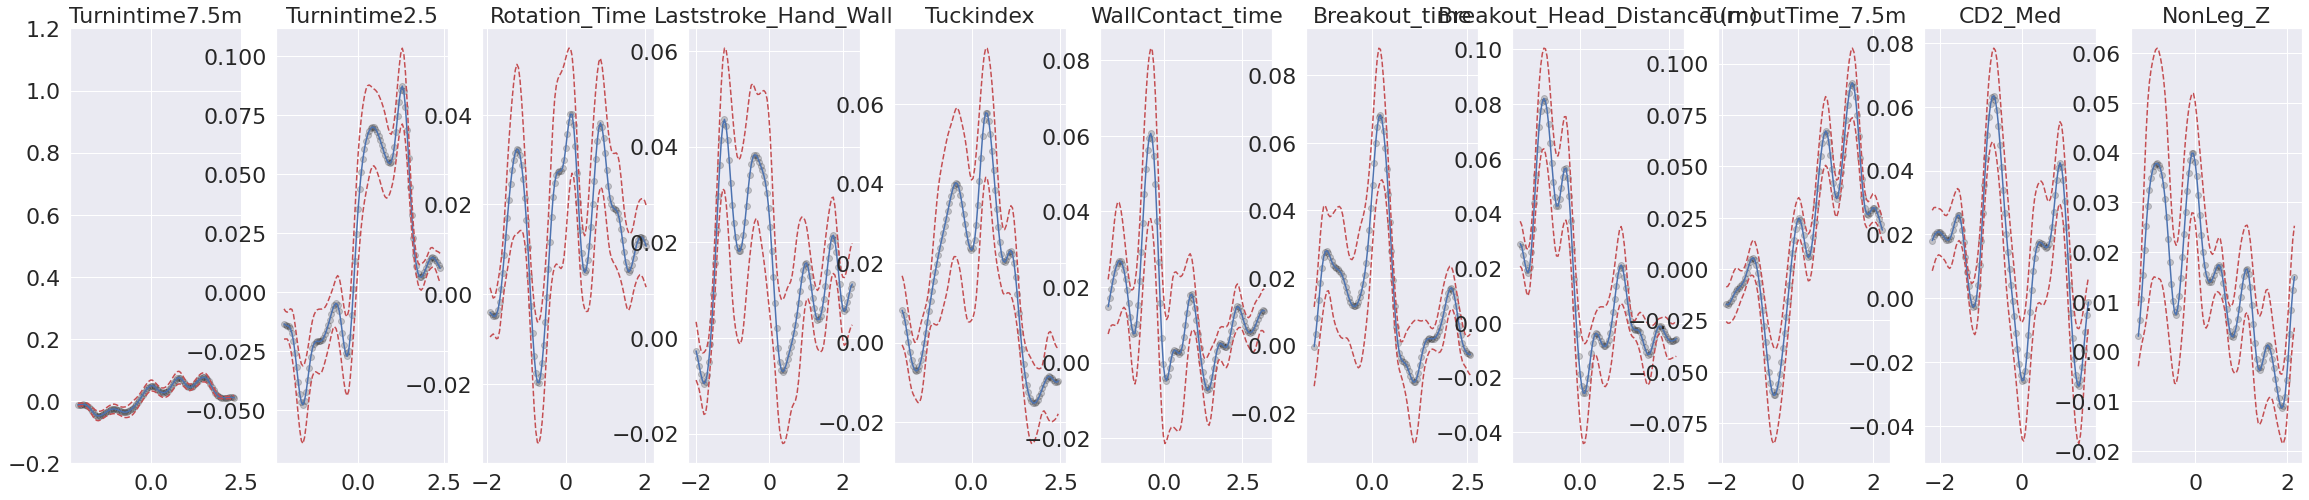

In [50]:
PlotAllFeatDep(X,gam)

In [51]:
TOC()


Elapsed time is 
44.28178858757019
seconds.

